In [1]:
from google.colab import drive
drive.mount('/content/drive')

#Librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import *
from sklearn.decomposition import PCA
import cv2
from scipy.signal import convolve2d
from sklearn.pipeline import Pipeline
from skimage import filters

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Carga de datasets
X_test = pd.read_csv("drive/My Drive/Colab Notebooks/Datos.csv", header=None).values.astype(float)


In [0]:
y_test= pd.read_csv("drive/My Drive/Colab Notebooks/labels.csv", header=None).values

In [0]:
X_train= pd.read_csv("drive/My Drive/Colab Notebooks/emnist-letters-train-images2.csv", header=None).values.astype(float)

In [0]:
y_train= pd.read_csv("drive/My Drive/Colab Notebooks/emnist-letters-train-labels2.csv", header=None).values

In [44]:
print ('Caracteristicas de Train:',X_train.shape, type(X_train),'Caracteristicas de Test:',X_test.shape)

Caracteristicas de Train: (62400, 784) <class 'numpy.ndarray'> Caracteristicas de Test: (650, 784)


In [0]:
#Para rotar la imagen 
for j in range(62400):
    Y=X_train[j].reshape(28,28).T
    X_train[j]=Y.reshape(784)
    
#for j in range(650):
 #   Y=X_test[j].reshape(28,28).T
  #  X_test[j]=Y.reshape(784)

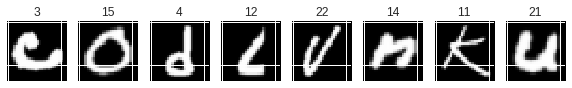

In [46]:
#Visualizar algunos datos
perm = np.random.permutation(range(X_train.shape[0]))[0:8]
random_imgs   = X_train[perm]
random_labels = y_train[perm] 
fig = plt.figure(figsize=(10,10))
print 
for i in range(random_imgs.shape[0]):
    ax=fig.add_subplot(1,8,i+1)
    plt.imshow(random_imgs[i].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_title(int(random_labels[i]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    

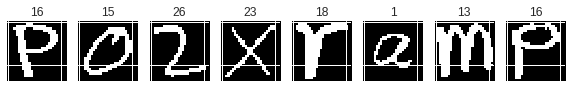

In [47]:
#Visualizar algunos datos
perm = np.random.permutation(range(X_test.shape[0]))[0:8]
random_imgs   = X_test[perm]
random_labels = y_test[perm] 
fig = plt.figure(figsize=(10,10))
print 
for i in range(random_imgs.shape[0]):
    ax=fig.add_subplot(1,8,i+1)
    plt.imshow(random_imgs[i].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_title(int(random_labels[i]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

In [48]:
#Balanceo de clases:
#Cantiadad de datos por cada clase-test 
for i in np.unique(y_test):
    print (i, np.sum(y_test==i)),

1.0 25
2.0 25
3.0 25
4.0 25
5.0 26
6.0 24
7.0 25
8.0 25
9.0 25
10.0 25
11.0 25
12.0 25
13.0 25
14.0 25
15.0 25
16.0 25
17.0 25
18.0 24
19.0 25
20.0 25
21.0 25
22.0 25
23.0 25
24.0 25
25.0 25
26.0 25
28.0 1


In [49]:
#Balanceo de clases:
#Cantiadad de datos por cada clase-train
for i in np.unique(y_train):
    print (i, np.sum(y_train==i)),

1 2400
2 2400
3 2400
4 2400
5 2400
6 2400
7 2400
8 2400
9 2400
10 2400
11 2400
12 2400
13 2400
14 2400
15 2400
16 2400
17 2400
18 2400
19 2400
20 2400
21 2400
22 2400
23 2400
24 2400
25 2400
26 2400


In [0]:
#Clasificadores

est1=RandomForestClassifier(n_estimators=80,  max_depth = 20)
est2=SVC(kernel="linear",gamma="scale",coef0=0.4)
est3=DecisionTreeClassifier(max_depth=20)
est4= GaussianNB()

In [0]:
#Convolución
for j in range(62400):
  
    X= filters.roberts(X_train[j].reshape(28,28), mask=None)
    X_train[j]=X.reshape(784)
    
for j in range(650):
  X= filters.roberts(X_test[j].reshape(28,28), mask=None)
  X_test[j]=X.reshape(784)


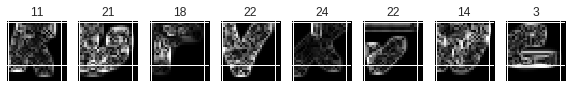

In [29]:
#Visualizar algunos datos
perm = np.random.permutation(range(X_train.shape[0]))[0:8]
random_imgs   = X_train[perm]
random_labels = y_train[perm] 
fig = plt.figure(figsize=(10,10))
print 
for i in range(random_imgs.shape[0]):
    ax=fig.add_subplot(1,8,i+1)
    plt.imshow(random_imgs[i].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_title(int(random_labels[i]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    

In [51]:
#Ajuste de componentes PCA --Tuning

#Random Forest
n_components = range(10,100,10)
scores=[]
for n in n_components:
    xtrain=np.copy(X_train)
    xtest=np.copy(X_test)
    print (n),
    pca=PCA(n_components=n)
    xtrain = pca.fit_transform(xtrain)
    xtest = pca.transform (xtest)
    est1.fit(xtrain,y_train)
    scores.append(est1.score(xtest,y_test))
    
scores = np.r_[scores]
#stds  = np.r_[stds]
print (scores)

10


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


20


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


30


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


40


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


50


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


60


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


70


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


80


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


90


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


[0.38923077 0.46615385 0.5        0.48461538 0.49846154 0.48769231
 0.49538462 0.50153846 0.47846154]


Text(0.5, 1.0, 'Random_Forest_Classifier')

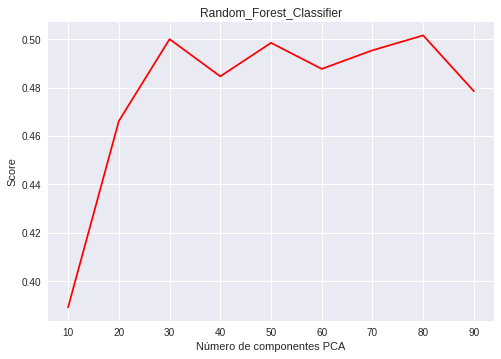

In [52]:
#Grafica Random Forest
plt.plot(n_components, scores, color="red")
plt.xlabel("Número de componentes PCA")
plt.ylabel("Score")
plt.title("Random_Forest_Classifier")

In [0]:
xtrainRF=np.copy(X_train)
xtestRF=np.copy(X_test)

In [0]:
#PCA con n componentes
pca=PCA(n_components=80)
xtrainRF = pca.fit_transform(xtrainRF)
xtestRF = pca.transform (xtestRF)

In [55]:
xtrainRF.shape

(62400, 80)

In [56]:
#RandomForest
est1.fit(xtrainRF,y_train)
predictions = est1.predict(xtestRF)
print ("%.3f"%accuracy_score(predictions, y_test))

#Matriz de confusión 
mc=confusion_matrix(y_test, predictions)
print ("matrix de confusión en test\n", mc)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


0.465
matrix de confusión en test
 [[ 7  0  1  1  0  0  1  0  0  5  1  0  0  1  0  0  2  0  0  1  4  0  1  0
   0  0  0]
 [ 0  7  2  1  0  0  1  5  0  1  0  0  4  0  0  0  0  0  0  2  0  0  2  0
   0  0  0]
 [ 1  0 20  0  0  3  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0  0  0]
 [ 0  1  0 10  0  1  0  0  0  2  0  0  1  0  0  0  1  0  0  1  2  0  4  0
   2  0  0]
 [ 0  1  6  0  6  2  2  0  0  0  1  0  0  0  1  1  1  2  0  1  0  0  2  0
   0  0  0]
 [ 0  0  2  0  0 11  0  0  1  0  0  1  0  0  0  1  0  3  0  3  1  0  0  1
   0  0  0]
 [ 0  0  0  0  0  0 10  0  0  5  1  0  3  1  0  1  0  0  0  1  0  0  1  0
   2  0  0]
 [ 0  1  0  0  0  0  0 12  1  0  3  0  1  0  0  0  1  1  0  1  1  0  1  0
   0  2  0]
 [ 0  2  2  0  0  0  1  0  7  3  1  5  0  0  0  0  2  0  0  2  0  0  0  0
   0  0  0]
 [ 1  0  0  2  0  2  1  0  1 13  0  1  0  0  0  0  0  1  0  0  0  0  2  0
   1  0  0]
 [ 0  2  0  0  0  1  0  0  0  0 19  0  0  1  0  0  1  0  0  0  0  0  0  1
   0  0  0]
 [ 0  1  2  2  0  1

In [57]:
#Decision Tree
n_components = range(10,100,10)
scores=[]
for n in n_components:
    xtrain=np.copy(X_train)
    xtest=np.copy(X_test)
    print (n),
    pca=PCA(n_components=n)
    xtrain = pca.fit_transform(xtrain)
    xtest = pca.transform (xtest)
    est3.fit(xtrain,y_train)
    scores.append(est3.score(xtest,y_test))
    
scores = np.r_[scores]
#stds  = np.r_[stds]
print (scores)

10
20
30
40
50
60
70
80
90
[0.26615385 0.27846154 0.29846154 0.29846154 0.26769231 0.26153846
 0.26307692 0.27230769 0.26923077]


Text(0.5, 1.0, 'Decision_Tree')

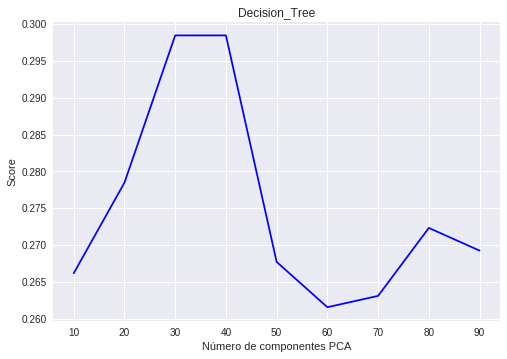

In [58]:
#Grafica Decision Tree
plt.plot(n_components, scores, color="blue")
plt.xlabel("Número de componentes PCA")
plt.ylabel("Score")
plt.title("Decision_Tree")

In [0]:
xtrainDT=np.copy(X_train)
xtestDT=np.copy(X_test)

In [0]:
#PCA con n componentes
pca=PCA(n_components=35)
xtrainDT = pca.fit_transform(xtrainDT)
xtestDT = pca.transform (xtestDT)

In [62]:
xtrainDT.shape

(62400, 35)

In [63]:
#DecisionTree
est3.fit(xtrainDT,y_train)
predictions = est3.predict(xtestDT)
print ("%.3f"%accuracy_score(predictions, y_test))

#Matriz de confusión 
mc=confusion_matrix(y_test, predictions)
print ("matrix de confusión en test\n", mc)

0.288
matrix de confusión en test
 [[ 4  1  1  2  0  4  1  0  0  0  2  0  0  1  1  0  2  1  0  0  1  0  0  2
   2  0  0]
 [ 0  4  0  1  1  0  2  8  0  0  1  1  1  2  1  0  0  0  0  1  1  0  1  0
   0  0  0]
 [ 1  0  8  3  0  0  2  0  0  0  0  3  1  0  2  1  2  0  0  1  0  0  0  0
   1  0  0]
 [ 0  1  1 11  1  0  3  1  0  1  1  0  0  0  0  0  0  0  0  0  1  0  2  1
   1  0  0]
 [ 0  1  0  2  3  2  0  1  0  0  0  1  2  0  0  5  3  0  2  2  0  0  1  0
   1  0  0]
 [ 0  0  2  0  1  7  0  1  1  1  2  3  0  1  0  0  1  0  0  2  0  0  0  1
   0  1  0]
 [ 0  1  0  3  0  0  6  0  1  0  2  0  1  0  0  1  1  0  0  2  3  0  1  1
   2  0  0]
 [ 0  0  0  0  1  2  0 12  1  1  0  0  2  1  0  0  0  0  0  0  1  1  1  1
   0  1  0]
 [ 1  1  0  0  2  1  1  2  6  1  1  3  0  0  1  0  0  0  2  1  0  0  0  0
   1  1  0]
 [ 0  0  0  2  0  1  1  0  2  7  2  1  0  0  1  1  1  1  0  1  0  1  0  0
   3  0  0]
 [ 2  0  0  1  0  0  0  0  0  0 14  0  1  2  0  0  2  0  0  0  0  1  0  1
   1  0  0]
 [ 0  1  1  1  0  0

In [0]:
#SVM
est2.fit(X_train,y_train)
predictions = est2.predict(X_test)
print ("%.3f"%accuracy_score(predictions, y_test))

#Matriz de confusión 
mc=confusion_matrix(y_test, predictions)
print ("matrix de confusión en test\n", mc)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
#GaussianNB
n_components = range(10,100,10)
scores=[]
for n in n_components:
    xtrain=np.copy(X_train)
    xtest=np.copy(X_test)
    print (n),
    pca=PCA(n_components=n)
    xtrain = pca.fit_transform(xtrain)
    xtest = pca.transform (xtest)
    est4.fit(xtrain,y_train)
    scores.append(est4.score(xtest,y_test))
    
scores = np.r_[scores]
#stds  = np.r_[stds]
print (scores)

10


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


20


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


30


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


40


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


50


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


60


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


70


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


80


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


90
[0.22307692 0.27076923 0.30615385 0.28       0.27384615 0.27384615
 0.27230769 0.25076923 0.20461538]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'GaussianNB')

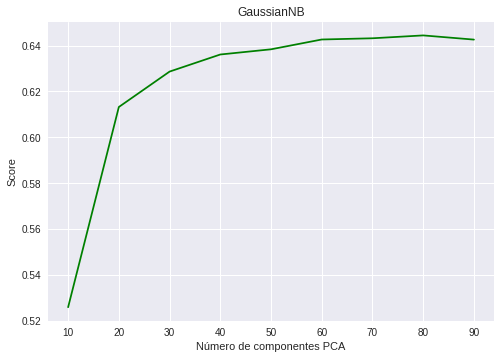

In [0]:
#Grafica GaussianNB
plt.plot(n_components, scores, color="green")
plt.xlabel("Número de componentes PCA")
plt.ylabel("Score")
plt.title("GaussianNB")

In [0]:
xtrainGNB=np.copy(X_train)
xtestGNB=np.copy(X_test)

In [0]:
#PCA con n componentes
pca=PCA(n_components=80)
xtrainGNB = pca.fit_transform(xtrainGNB)
xtestGNB = pca.transform (xtestGNB)

In [0]:
xtrainGNB.shape

(62400, 80)

In [0]:
#GaussianNB
est4.fit(xtrainGNB,y_train)
predictions = est4.predict(xtestGNB)
print ("%.3f"%accuracy_score(predictions, y_test))

#Matriz de confusión 
mc=confusion_matrix(y_test, predictions)
print ("matrix de confusión en test\n", mc)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.644
matrix de confusión en test
 [[380   8  12  30  54   6  25  45   0   3  25   4   8  63  35   6  43   4
    3   0  15   0   3   6   4  18]
 [ 10 493   0  42  19   0  51  76   6  14   2   3   0   3   7   4  14   1
   14   8   4   0   1   1   5  22]
 [ 33  13 526   5  69   3  33   0   2   5   3  19   0   0  51   2   9  15
    2   5   0   0   2   1   0   2]
 [ 14  60   5 481   3   5  15  19   2  33  14   4   2   7  65   6   7   1
    4   7  12  14   2   0   2  16]
 [ 54  21  61   3 509   9  34   1   1   0   3   6   0   2  39   2  12  16
    6   6   0   1   0   1   1  12]
 [  9   1   0  10   6 492  23   6   4   8   1  12   1   3   1  89  13  33
    4  61   2   2   0   2  15   2]
 [ 32  58  20  15  21  20 328  13   1  30   3   0   0   3  13   9 146   2
   25  24   2   6   2   0  21   6]
 [ 17  22   2  27   0   5  15 507   7   6  39  15   6  74   2   3   7   1
    1   4  15   5   5   8   6   1]
 [  1  13   2   1   1   2   2   0 546  21   3 142   0   1   0   0   4   3
    9   6   1   2  